## Steps in this notebook Task 6.2

- Step 1: importing dataframe
- Step 2: subsetting the data according to Indicator Name [survey questions] and creating some basic explanatory tables
- Step 2: creat a heat map
- Step 3: creating scattorplot for each subset
- Step 4: creating pairplot for each subset
- Step 5: creating a histoplot
- Step 6: creating categorical plot for each subset
- step 7: saving subsets

## Step 1. Importing Dataframes

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
from dython.nominal import associations

## Step 1: Importing dataframe

In [2]:
# Creating path
path =r'/Users/parvinrahimi/Desktop/Data/Data Immersion/Achievement 6/Violence'

In [3]:
# Importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data','Clean Data','EU_Data.pkl'))

In [4]:
# determining the current version of matplotlib installed
matplotlib.__version__

'3.7.0'

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

## Step 2. Subsetting data according to "Indicator Name"

## Questions in Indicator Name (relevant survey questions):

df_1: Indicator Name: Intentional homicides, female (per 100,000 female)
- Indicator Code: VC.IHR.PSRC.FE.P5
    
df_2: Indicator Name: There is legislation specifically addressing domestic violence (1=yes; 0=no)
- Indicator Code: SG.LEG.DVAW
                       
df_3: Indicator Name: There is legislation on sexual harassment in employment (1=yes; 0=no)
- Indicator Code: SG.LEG.SXHR.EM          
           
Indicator Name: Proportion of women who have ever experienced any form of sexual violence (% of women ages 15-49)
- Indicator Code: SG.VAW.AFSX.ZS: not enough data!

In [6]:
# Creating subsets for each question in "Indicator Name"
df_1 = df.loc[df['Indicator Code'] == 'VC.IHR.PSRC.FE.P5'] # intentional homicide

In [7]:
# Creating subsets for each question in "Indicator Name"
df_2 = df.loc[df['Indicator Code'] == 'SG.LEG.DVAW'] #legislation on domestic violence

In [8]:
# Creating subsets for each question in "Indicator Name"
df_3 = df.loc[df['Indicator Code'] == 'SG.LEG.SXHR.EM'] #legislation on sexual harassment at work

In [9]:
# mean of intentionsl homicide per 100,000 women
df_1['Value'].mean()

0.7808764940239044

In [10]:
# grouping the homicide data by region 
df_homicide = df_1.groupby([ 'EU Region']).agg({'Value': ['sum','mean', 'max']})

In [11]:
df_homicide

Value              
                  sum      mean max
EU Region                          
Eastern Europe    310  1.675676  13
Northern Europe   169  0.880208   7
Southern Europe    70  0.282258   7
Western Europe     39  0.304688   2

#### The table shows that eastern europe with a total number of 310 intentional homicide on women since 2000 has the highest rate in Europe.

In [12]:
# grouping the data on legislation on domestic violence by region
df_l_domestic= df_2.groupby(['EU Region']).agg({'Value': ['value_counts']})

In [13]:
df_l_domestic

Value
                      value_counts
EU Region       Value             
Eastern Europe  1              137
                0               70
Northern Europe 1              147
                0               83
Southern Europe 1              208
                0               91
Western Europe  1              124
                0               37

In [14]:
# grouping the data on legislation on sexual harassment at work by region
df_l_harassement = df_3.groupby(['EU Region']).agg({'Value': ['value_counts']})

In [15]:
df_l_harassement

Value
                      value_counts
EU Region       Value             
Eastern Europe  1              135
                0               72
Northern Europe 1              202
                0               28
Southern Europe 1              229
                0               70
Western Europe  1              151
                0               10

## Step 2. Creating a heatmap in seaborn

#### Since the "Value" column refers to different survey questions that assmume inconsistent values, I decided to create a heatmap for only the data on intentional homicide. Each subset of the dataframe has only one string variable. Thus the heatmap was created using dython library instead, which can be used on categorical variables. 

In [16]:
# Create a subset excluding the irrelevant columns
sub_cor = df_1[['Country Name','EU Region','Value']]

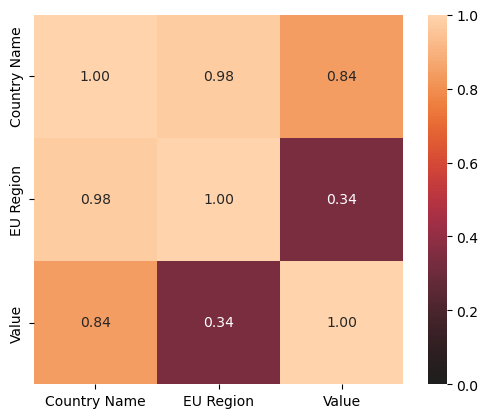

In [17]:
heatmap = associations(sub_cor)

####The heatmap shows that there is a weak correlation (0,34) between intentional homicide rate and the EU region. However there is a strong correlation (0,98) between Country and intentional homicide rate.

## Step 3: Creating scatterplot

#### Due to the same reason mentioned in step 2, the scatterplot takes one categorical variable "Year" and one string Variable "Value" also for data in intentional homicide.

TypeError: can't multiply sequence by non-int of type 'float'

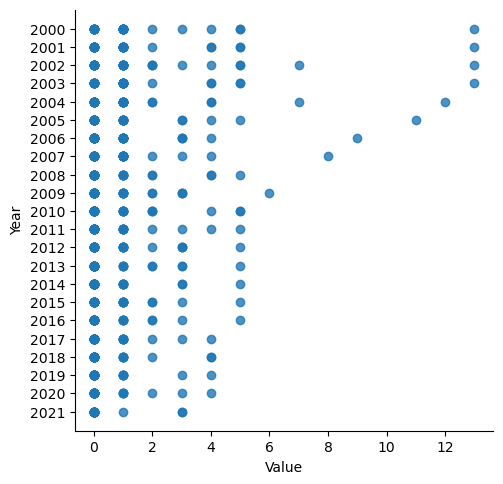

In [18]:
# Create a scatterplot for the "Year" and "Value" columns 
scat_1 =sns.lmplot(x = 'Value', y = 'Year', data = df_1)

#### The data shows that since 2009 most countries in Europe have an intentional homicide rate between under 5 per 100000 women. Before 2009 however the rates were higher in some countries with four cases of over 12 women. 

## Step 4: Creating pairplots

In [ ]:
# selecting variables needed for the pair plot for data on intentional homicide
pair_1 = df_1[['EU Region', 'Value']]

In [ ]:
# Create a pair plot 
pp_1=sns.pairplot(pair_1, hue= 'EU Region')


#### The pair plot of the data on intentional homicide shows that there are regional differences when it comes to female intentional homicide rate.

In [ ]:
# selecting variables needed for the data on legislation on domestic violence
pair_2 = df_2[['EU Region', 'Value']]

In [ ]:
# Create a pair plot 
pp_2=sns.pairplot(pair_2, hue= 'EU Region')

#### The pair plot of the data on legislation on domestic violence shows that there are minimal regional differences in Europe, with Southern Europe having better legislative conditions.

In [ ]:
# selecting variables needed for the data on legislation on sexual harassment at work
pair_3 = df_3[['EU Region', 'Value']]

In [ ]:
# Create a pair plot 
pp_3=sns.pairplot(pair_3, hue='EU Region')

#### The pair plot of the data on legislation on sexual harassment at work shows that there are regional differences.

## Step 5: Creating a histoplot

In [ ]:
# histogram to visualize the distribution of the variables in each subset
# data on intentional homicide
his_1 = sns.histplot(df_1['Value'], bins = 20, kde = True)

#### Most countries have zero intentional homicide. The data with a value higher that 5 is very little.

In [ ]:
# data on legislation on domestic violence
his_2 = sns.histplot(df_2['Value'], bins = 20, kde = True)

#### Most countries do have laws on domestic violence.

In [ ]:
# data on legislaton on sexual harassment at work
his_3 = sns.histplot(df_3['Value'], bins = 20, kde = True)

#### There are even more laws on sexual harassment at work!

## Step 6: Creating categorical plots

In [ ]:
# Create a categorical plot for each subset
# data on intentional homicide
sns.set(style="ticks")
cat_1 = sns.catplot(x="Country Code", y="Value", hue="EU Region", data=df_1)

#### Eastern Europe (green) has the highest intentional homicide rate among all regions with Northern Europe following.

In [ ]:
# data on legislation on domestic violence
sns.set(style="ticks")
cat_2 = sns.catplot(x="Country Code", y="Value", hue="EU Region", data=df_2)

#### same results as the pairplot.(see step 4)

In [ ]:
# data on legislation on sexual harassment at work
sns.set(style="ticks")
cat_3 = sns.catplot(x="Country Code", y="Value", hue="EU Region", data=df_3)

#### same results as the pairplots. (See step 4)

## Step 7: Saving subsets

In [ ]:
# exporting as pkl
df_1.to_pickle(os.path.join(path,'02 Data', 'Clean Data', 'homicide.pkl'))

In [ ]:
# exporting as pkl
df_2.to_pickle(os.path.join(path,'02 Data', 'Clean Data', 'l_domestic.pkl'))

In [ ]:
# exporting as pkl
df_3.to_pickle(os.path.join(path,'02 Data', 'Clean Data', 'l_harassement.pkl'))

In [19]:
# exporting as csv
df_1.to_csv(os.path.join(path,'02 Data', 'Clean Data', 'homicide.csv'))

In [20]:
# exporting as csv
df_2.to_csv(os.path.join(path,'02 Data', 'Clean Data', 'l_domestic.csv'))

In [21]:
# exporting as csv
df_3.to_csv(os.path.join(path,'02 Data', 'Clean Data', 'l_harassement.csv'))